In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
data = pd.read_csv("bsu/netflix_titles.csv")

In [169]:
print(data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [173]:
list(data.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [175]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [177]:
data.describe(include = "all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [179]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [181]:
shows = data[data['type'] == 'TV Show'].copy()

In [183]:
movies = data[data['type'] == 'Movie'].copy()

In [185]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [187]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

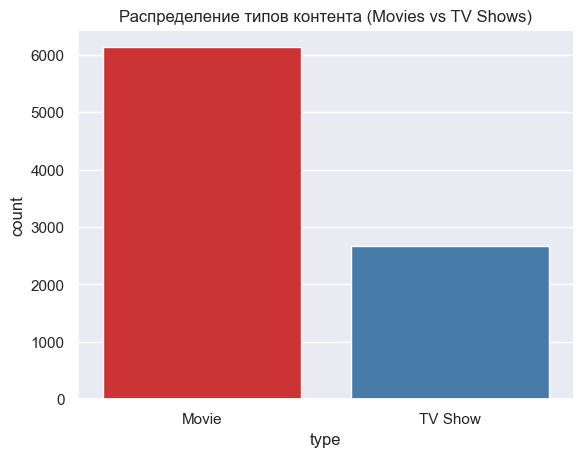

In [189]:
df = data
ax = sns.countplot(x='type', hue='type', data=df, palette='Set1', legend=False)
ax.set_title('Распределение типов контента (Movies vs TV Shows)')
plt.show()

<Axes: xlabel='release_year', ylabel='count'>

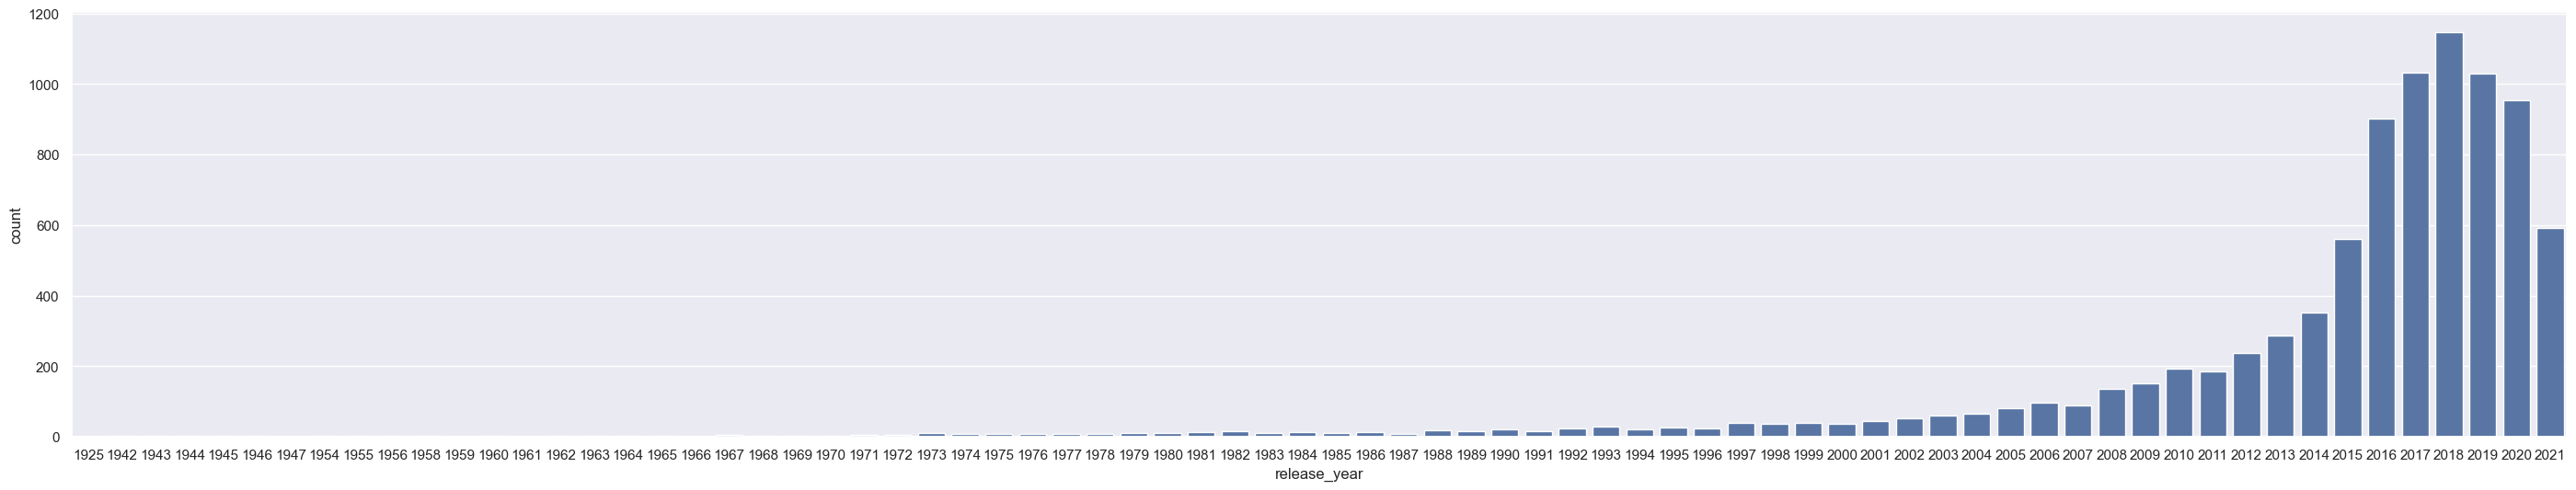

In [191]:
plt.figure(figsize = (35,6))
sns.countplot(x='release_year',data = df)

In [192]:
top = pd.Series(df['duration']).value_counts()
print(top)


duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64


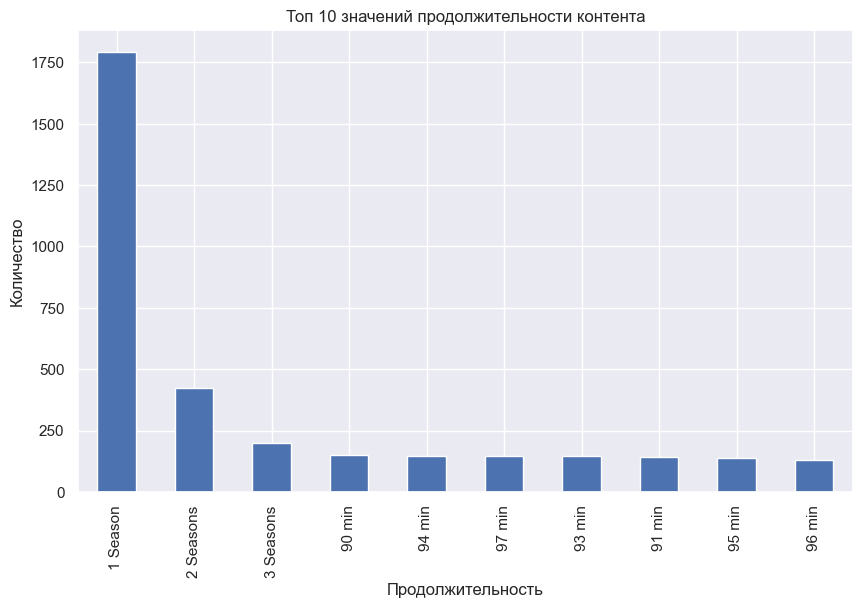

In [195]:
top = pd.Series(df['duration']).value_counts().head(10)
plt.figure(figsize=(10,6))
top.plot(kind='bar')
plt.title('Топ 10 значений продолжительности контента')
plt.xlabel('Продолжительность')
plt.ylabel('Количество')
plt.show()


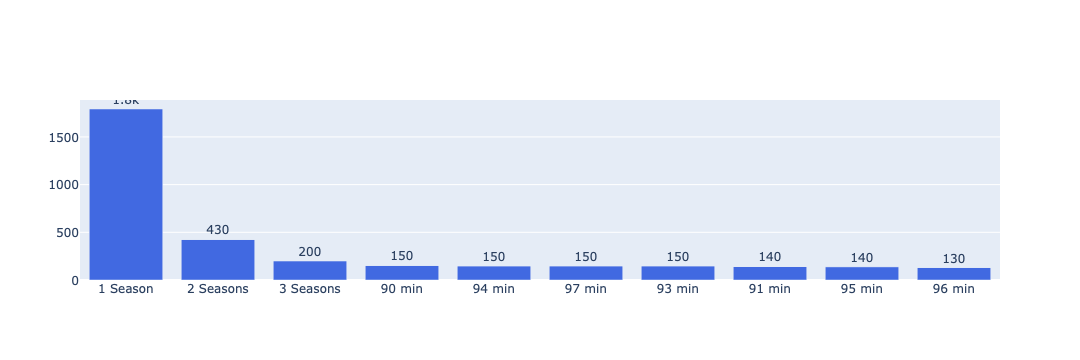

In [197]:
from plotly import graph_objects as go 
figure = go.Figure([
    go.Bar(
        x=top.index,          
        y=top.values,          
        text=top.values,       
        marker_color='royalblue' 
    )
])
figure.update_traces(
    texttemplate='%{text:.2s}',
    textposition='outside')    
figure.show()


In [199]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [201]:
date = shows[['date_added']].dropna()
date.isna().sum()

date_added    0
dtype: int64

In [203]:
date.head()

,date_added
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"


In [205]:
date['year'] = date['date_added'].apply(lambda x : x.split(', ')[-1]) 
date['month'] = date['date_added'].apply(lambda x : x.lstrip().split(' ')[0]) 
date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


In [207]:
date.sort_values(by=['year', 'month'])

,date_added,year,month
6611,"February 4, 2008",2008,February
5940,"August 2, 2013",2013,August
7112,"March 31, 2013",2013,March
6885,"October 8, 2013",2013,October
7908,"October 14, 2013",2013,October
...,...,...,...
153,"September 1, 2021",2021,September
154,"September 1, 2021",2021,September
160,"September 1, 2021",2021,September
165,"September 1, 2021",2021,September


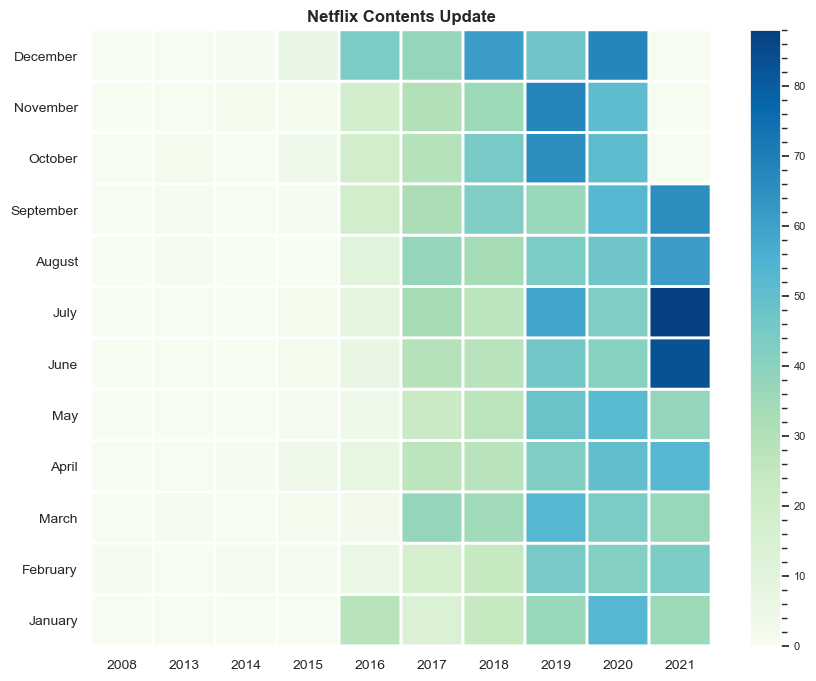

In [209]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 
    'June', 'July', 'August', 'September', 'October', 
    'November', 'December'
]
df = date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 8), dpi=100) 
plt.pcolor(df, cmap='GnBu', edgecolors='white', linewidths=2) 

plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=10)  
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=10)
plt.title('Netflix Contents Update', fontsize=12, fontweight='bold')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()  
plt.show()


Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

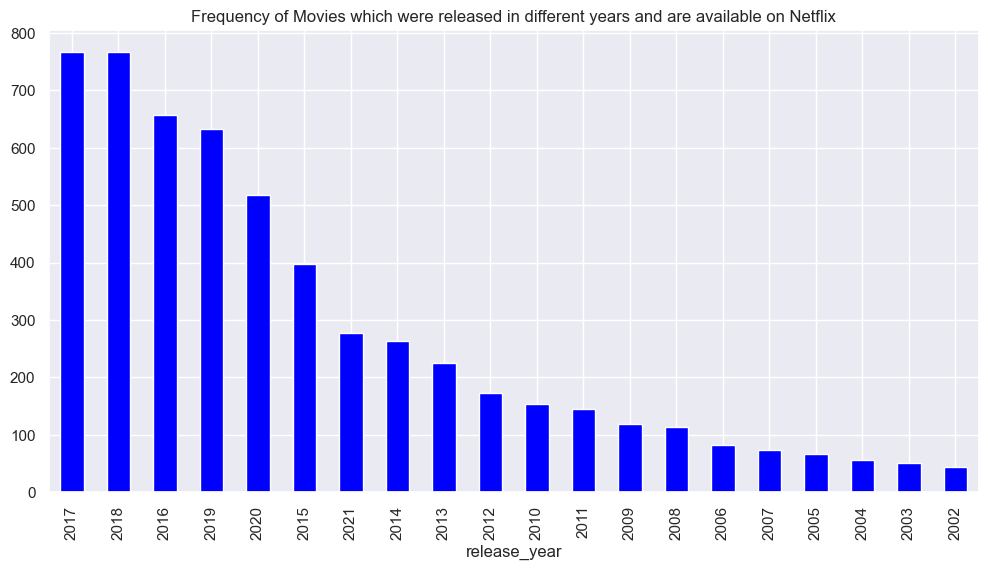

In [211]:
plt.figure(figsize=(12,6))
movies["release_year"].value_counts()[:20].plot(kind="bar",color="Blue")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

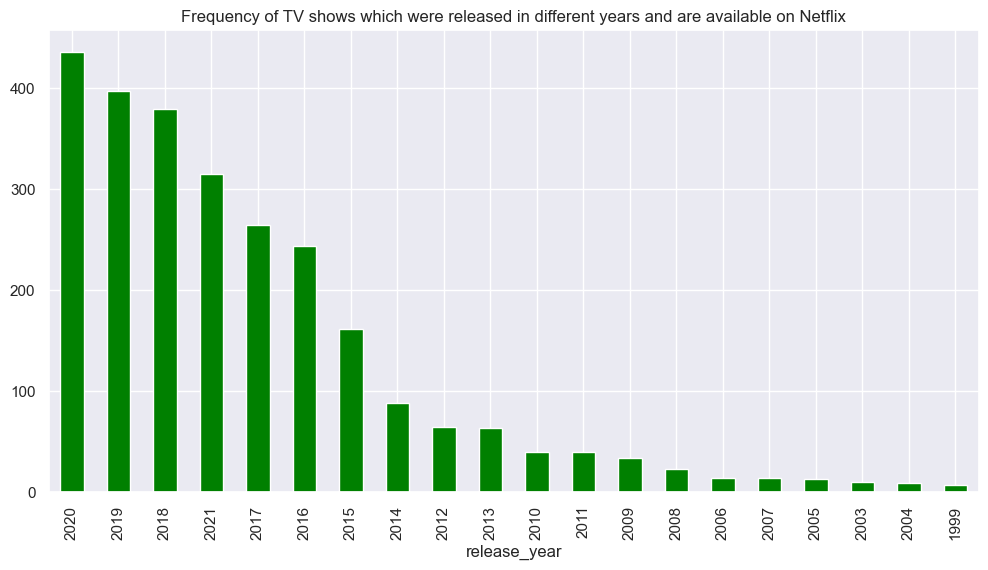

In [213]:
plt.figure(figsize=(12,6))
shows["release_year"].value_counts()[:20].plot(kind="bar",color="Green")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Top 10 Genres of Movies')

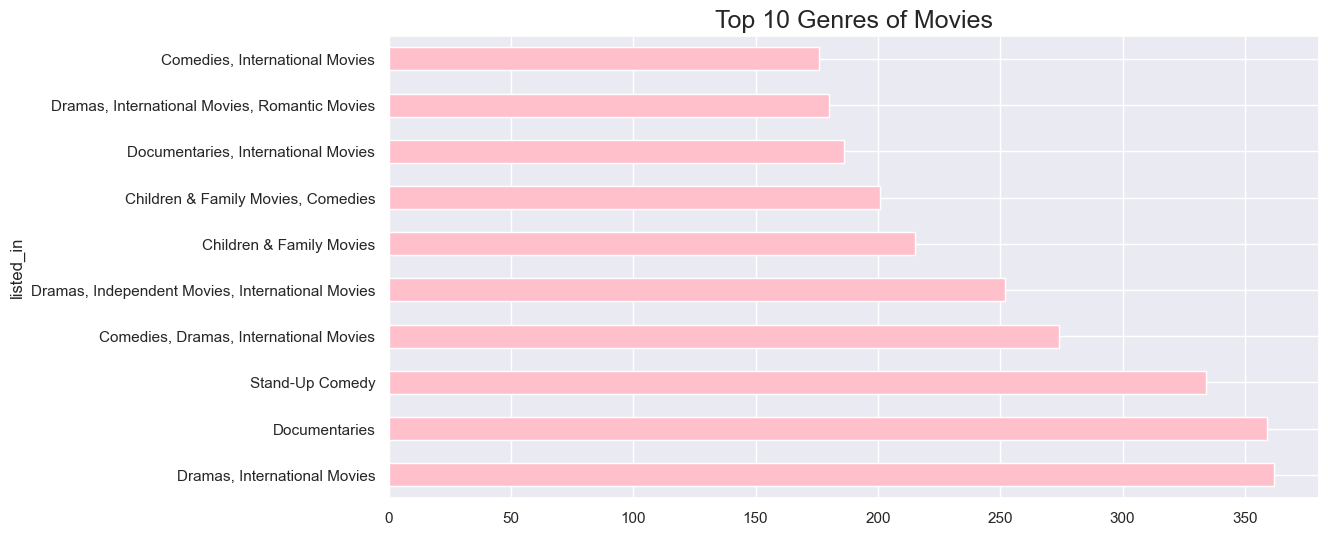

In [215]:
plt.figure(figsize=(12,6))
movies["listed_in"].value_counts()[:10].plot(kind="barh",color="pink")
plt.title("Top 10 Genres of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

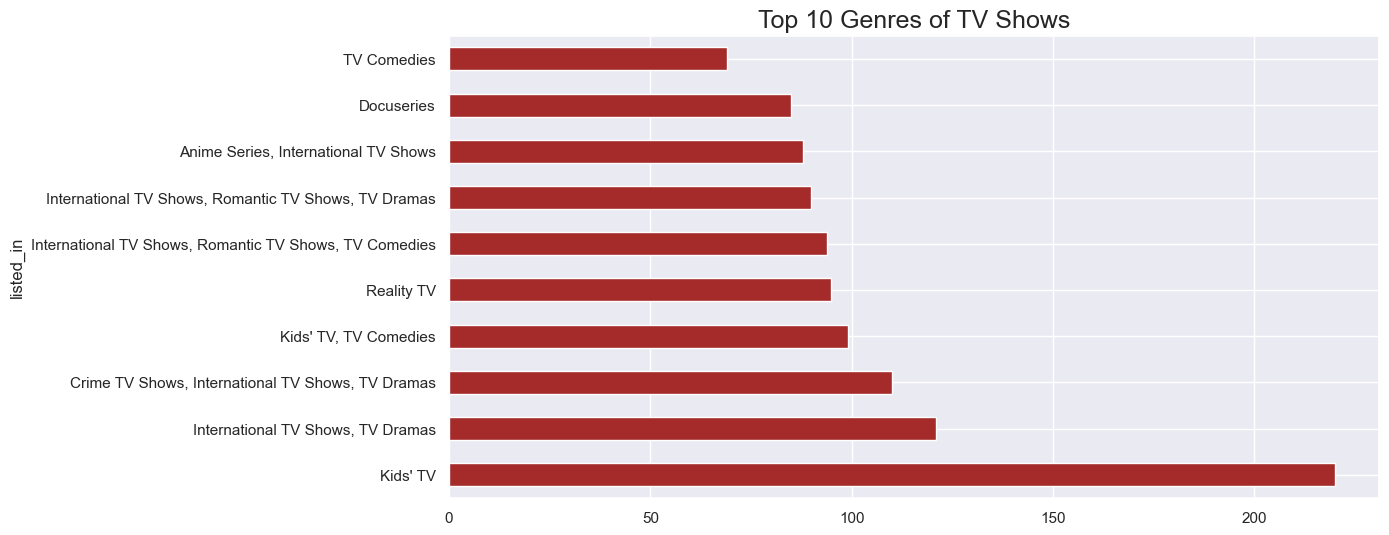

In [217]:
plt.figure(figsize=(12,6))
shows["listed_in"].value_counts()[:10].plot(kind="barh",color="brown")
plt.title("Top 10 Genres of TV Shows",size=18)

<Axes: xlabel='country'>

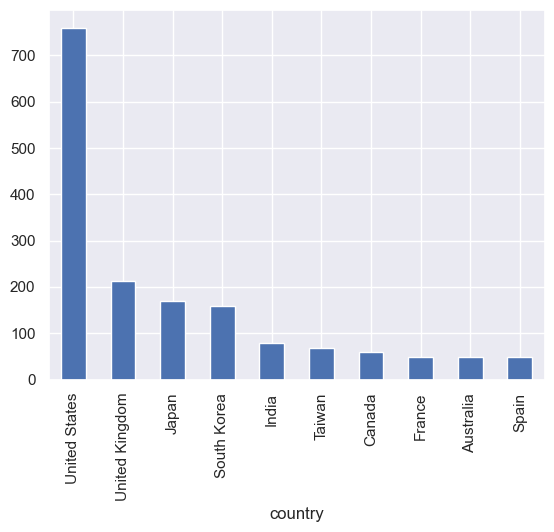

In [219]:
shows['country'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='country'>

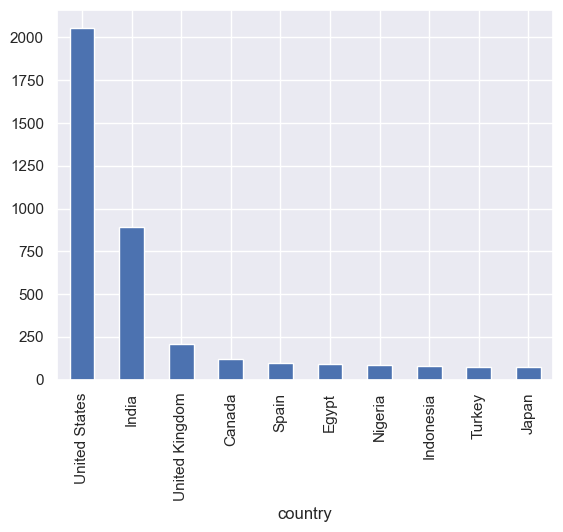

In [221]:
movies['country'].value_counts().head(10).plot(kind='bar')

In [223]:
top_countries = data['country'].value_counts()[:10]

In [225]:
print(top_countries)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


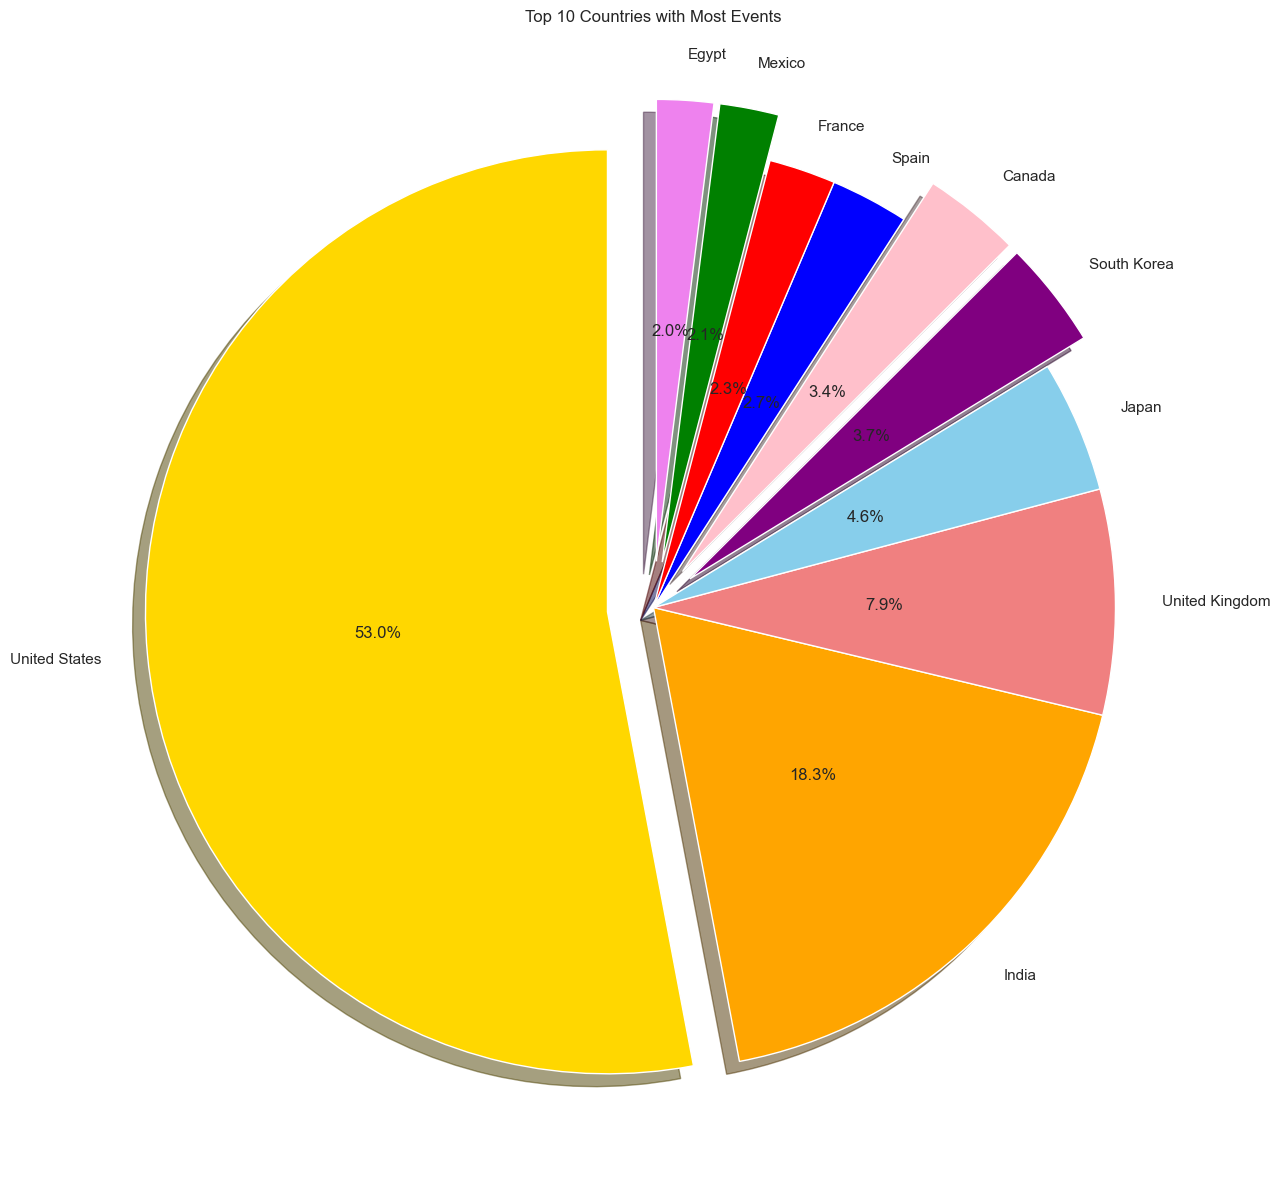

In [227]:
colors_list = ['gold', 'orange', 'lightcoral', 'skyblue', 'purple', 'pink', 'blue', 'red', 'green', 'Violet']
explode_list = [0.1 if i in [0, 4, 5, 8, 9] else 0 for i in range(len(top_countries))]  # Взрыв только для некоторых сегментов

top_countries.plot(kind='pie',
                   figsize=(15, 15),
                   autopct='%1.1f%%',  
                   startangle=90,      
                   shadow=True,         
                   pctdistance=0.5,     
                   colors=colors_list,  
                   explode=explode_list, 
                   textprops={'fontname': 'Arial'},  
                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, 
                   labels=top_countries.index  
                   )
plt.title('Top 10 Countries with Most Events')
plt.ylabel('')  
plt.show()

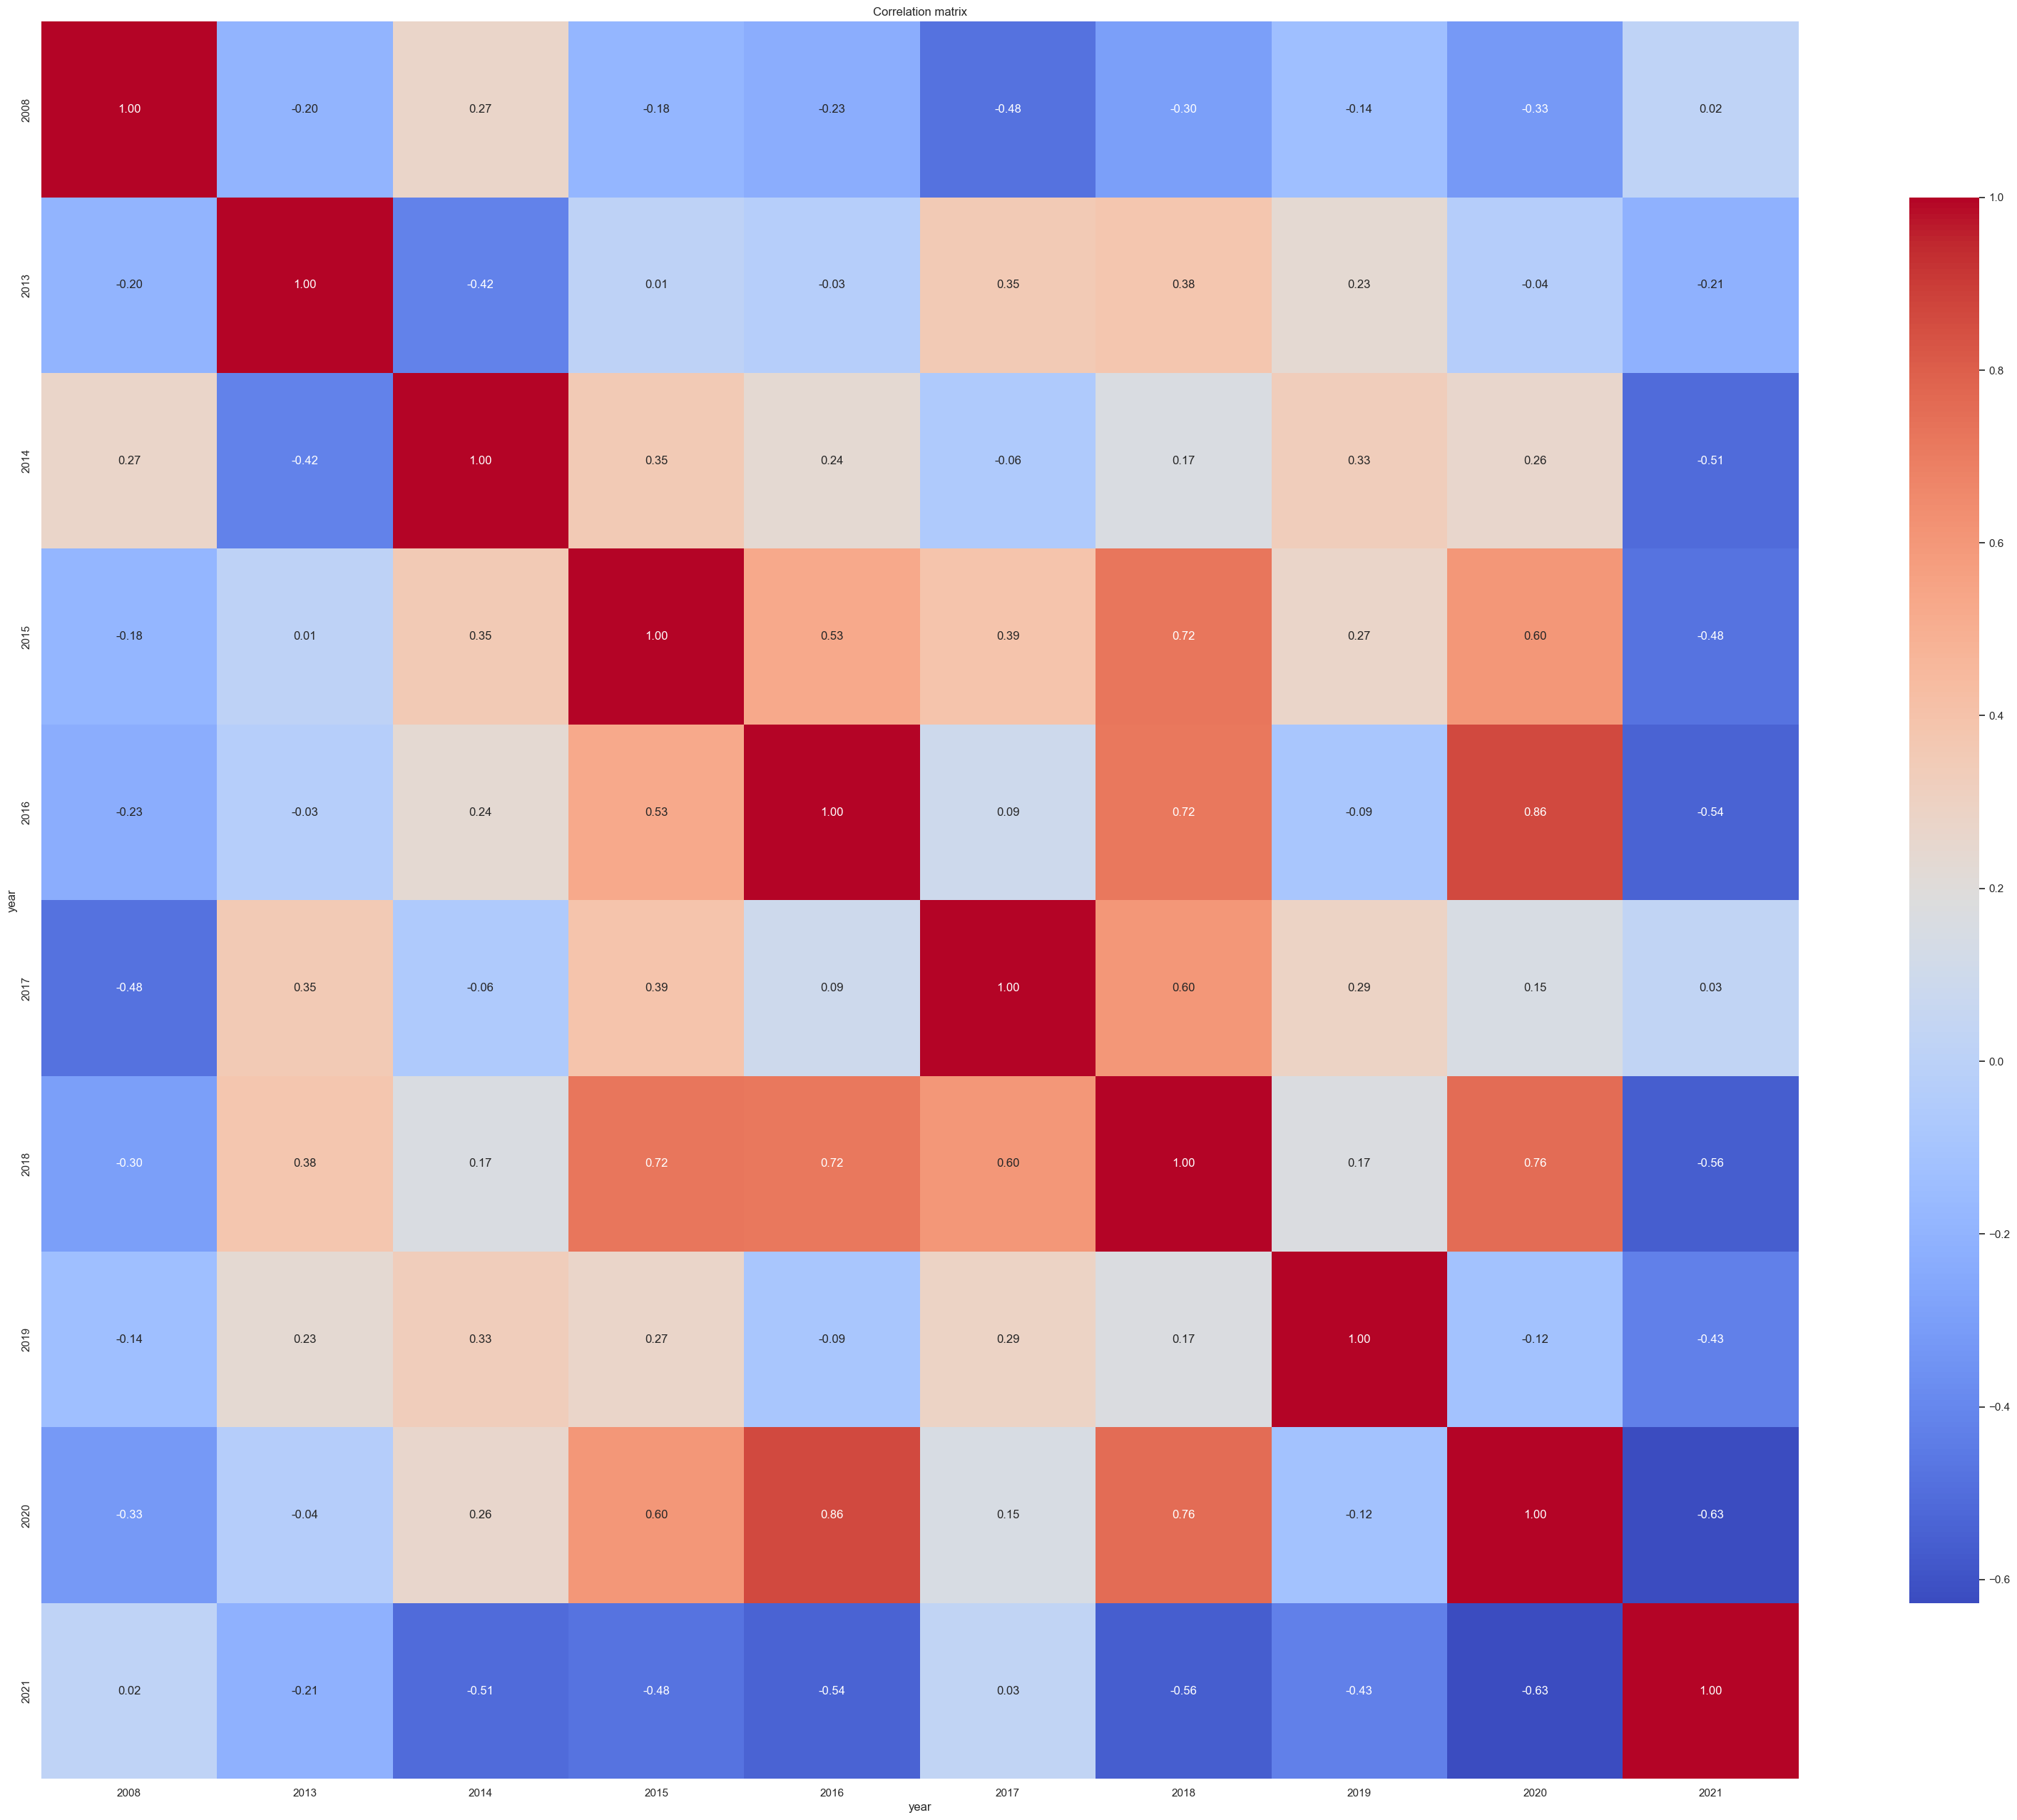

In [229]:
numeric_data = df.select_dtypes(include=['float64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(40, 32))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Сorrelation matrix')
plt.show()

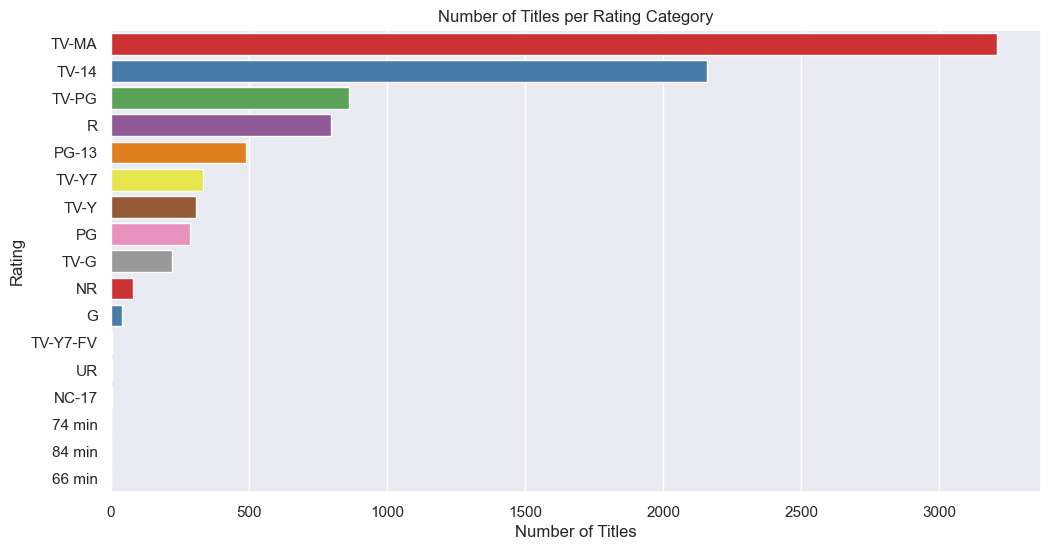

In [231]:
plt.figure(figsize=(12, 6))
titles_per_rating = data.groupby('rating')['title'].count().sort_values(ascending=False)
sns.barplot(x=titles_per_rating.values, y=titles_per_rating.index, hue = titles_per_rating.index, palette="Set1", legend=False)
plt.title('Number of Titles per Rating Category')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.show()

/var/folders/c5/5pjfgv2j0s592_vgx99mvzym0000gn/T/ipykernel_84067/1259812875.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




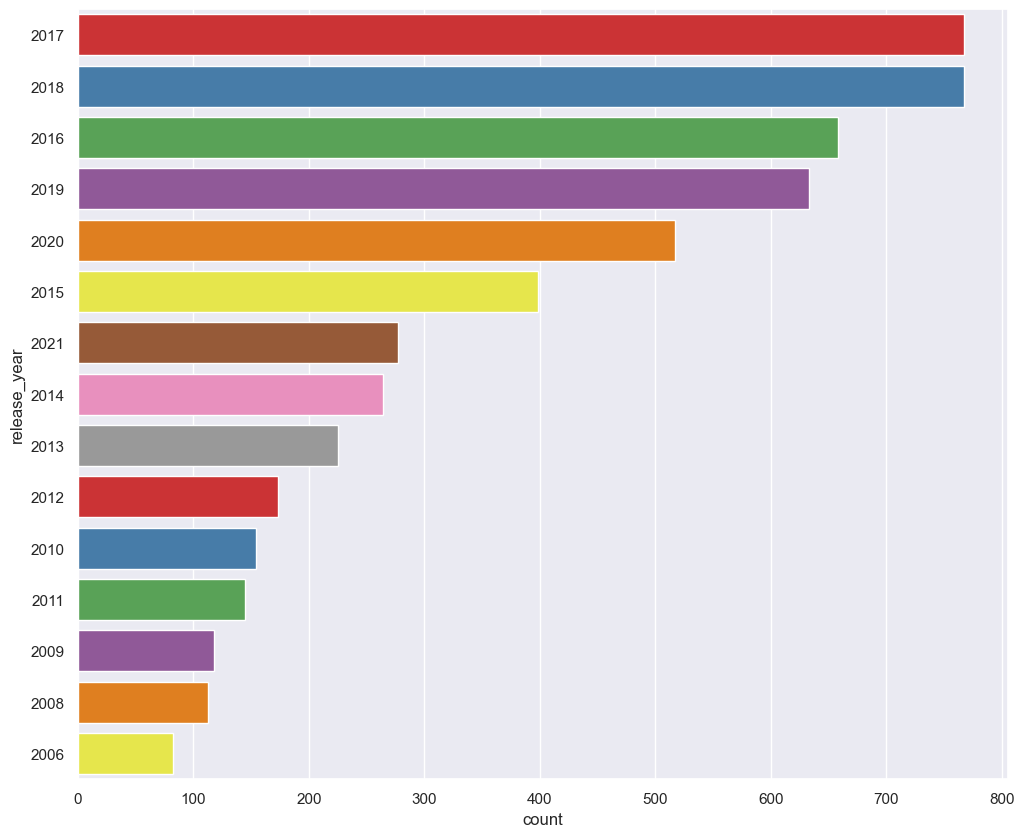

In [233]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data = movies, palette = 'Set1', order = movies['release_year'].value_counts().index[0:15])

In [235]:
movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [237]:
movies['country'].fillna('Unknow', inplace = True)
movies.isna().sum()

/var/folders/c5/5pjfgv2j0s592_vgx99mvzym0000gn/T/ipykernel_84067/3821694715.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





show_id           0
type              0
title             0
director        188
cast            475
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [239]:
movies['country'].value_counts()

country
United States                            2058
India                                     893
Unknow                                    440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: count, Length: 652, dtype: int64

In [241]:
countries_mov = {}
count = list (movies['country'])
for i in count:
    i = i.replace(' ', '')
    i = list(i.split(','))
    for j in i:
        if j in list(countries_mov.keys()) :
            countries_mov[j]+=1 
        else:
            countries_mov[j]=1

In [243]:
countries_mov

{'UnitedStates': 2752,
 'Unknow': 440,
 'Ghana': 5,
 'BurkinaFaso': 1,
 'UnitedKingdom': 534,
 'Germany': 182,
 'Ethiopia': 1,
 'CzechRepublic': 16,
 'India': 962,
 'France': 303,
 'China': 114,
 'Canada': 319,
 'SouthAfrica': 51,
 'Japan': 119,
 'Nigeria': 94,
 'Spain': 171,
 'Australia': 94,
 'Mexico': 111,
 'Italy': 75,
 'Romania': 14,
 'Argentina': 71,
 'Venezuela': 4,
 'HongKong': 100,
 'Nepal': 2,
 'NewZealand': 25,
 'Brazil': 66,
 'Greece': 9,
 'Colombia': 20,
 'Belgium': 78,
 'Switzerland': 18,
 'Bulgaria': 10,
 '': 6,
 'Algeria': 3,
 'Poland': 32,
 'Israel': 19,
 'SaudiArabia': 9,
 'Thailand': 46,
 'Indonesia': 86,
 'Egypt': 102,
 'Denmark': 34,
 'Kuwait': 5,
 'Netherlands': 42,
 'Singapore': 18,
 'Malaysia': 18,
 'SouthKorea': 61,
 'Vietnam': 7,
 'Hungary': 10,
 'Lebanon': 24,
 'Syria': 2,
 'Philippines': 80,
 'UnitedArabEmirates': 36,
 'Sweden': 31,
 'Qatar': 10,
 'Mauritius': 1,
 'Austria': 11,
 'Turkey': 83,
 'Russia': 11,
 'Taiwan': 19,
 'Cameroon': 1,
 'Palestine': 1,
 '

<Axes: xlabel='country'>

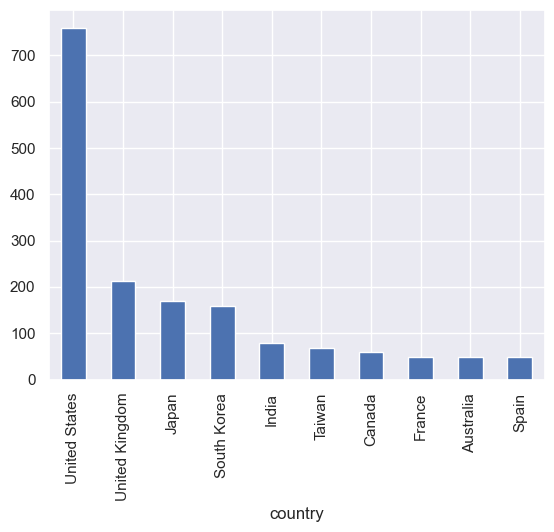

In [245]:
shows['country'].value_counts().head(10).plot(kind='bar')

In [247]:
movies['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [251]:
movies['listed_in']

0                                          Documentaries
6                               Children & Family Movies
7       Dramas, Independent Movies, International Movies
9                                       Comedies, Dramas
12                          Dramas, International Movies
                              ...                       
8801             Dramas, International Movies, Thrillers
8802                      Cult Movies, Dramas, Thrillers
8804                             Comedies, Horror Movies
8805                  Children & Family Movies, Comedies
8806      Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 6131, dtype: object

In [253]:
from collections import Counter

genres = list(movies['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))

g = Counter(gen)

In [97]:
g = sorted (g.items(), key = lambda item: g[item[0]], reverse=True)
g

[('InternationalMovies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('Documentaries', 869),
 ('Action&Adventure', 859),
 ('IndependentMovies', 756),
 ('Children&FamilyMovies', 641),
 ('RomanticMovies', 616),
 ('Thrillers', 577),
 ('Music&Musicals', 375),
 ('HorrorMovies', 357),
 ('Stand-UpComedy', 343),
 ('Sci-Fi&Fantasy', 243),
 ('SportsMovies', 219),
 ('ClassicMovies', 116),
 ('LGBTQMovies', 102),
 ('AnimeFeatures', 71),
 ('CultMovies', 71),
 ('Faith&Spirituality', 65),
 ('Movies', 57)]

In [99]:
genre_name = [name for name, value in g]
genre_name

['InternationalMovies',
 'Dramas',
 'Comedies',
 'Documentaries',
 'Action&Adventure',
 'IndependentMovies',
 'Children&FamilyMovies',
 'RomanticMovies',
 'Thrillers',
 'Music&Musicals',
 'HorrorMovies',
 'Stand-UpComedy',
 'Sci-Fi&Fantasy',
 'SportsMovies',
 'ClassicMovies',
 'LGBTQMovies',
 'AnimeFeatures',
 'CultMovies',
 'Faith&Spirituality',
 'Movies']

In [101]:
genre_values = [value for name, value in g]
genre_values

[2752,
 2427,
 1674,
 869,
 859,
 756,
 641,
 616,
 577,
 375,
 357,
 343,
 243,
 219,
 116,
 102,
 71,
 71,
 65,
 57]

/var/folders/c5/5pjfgv2j0s592_vgx99mvzym0000gn/T/ipykernel_84067/2303703478.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0.5, 1.0, 'Genres')

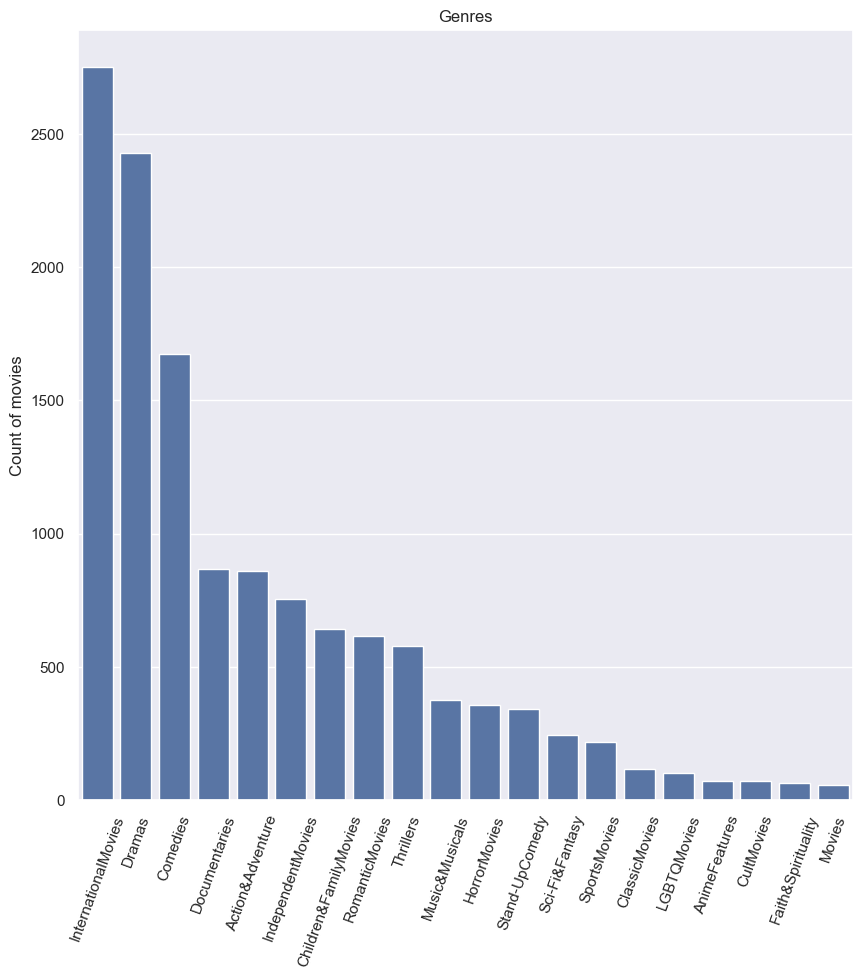

In [103]:
fig = plt.figure(figsize= (10, 10))
ax = sns.barplot(x=genre_name, y = genre_values)

ax.set_xticklabels(genre_name, rotation = 70)
ax.set_ylabel("Count of movies")
ax.set_title("Genres")

In [104]:
shows.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [107]:
shows['country'].fillna('Unknow', inplace = True)
shows.isna().sum()

/var/folders/c5/5pjfgv2j0s592_vgx99mvzym0000gn/T/ipykernel_84067/1123927220.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





show_id            0
type               0
title              0
director        2446
cast             350
country            0
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [109]:
shows['country'].value_counts()

country
United States                                    760
Unknow                                           391
United Kingdom                                   213
Japan                                            169
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: count, Length: 197, dtype: int64

In [111]:
countries_show = {}

count = list(shows['country'])
for i in count:
    i = i.replace(' ', '')
    i = list(i.split(','))
    for j in i:
        if j in list(countries_show.keys()):
            countries_show[j]+=1
        else:
            countries_show[j]=1

In [113]:
countries_show

{'SouthAfrica': 11,
 'Unknow': 391,
 'India': 84,
 'UnitedKingdom': 272,
 'UnitedStates': 938,
 'Mexico': 58,
 'Turkey': 30,
 'Australia': 66,
 'Finland': 4,
 'Nigeria': 9,
 'Japan': 199,
 'Belgium': 12,
 'France': 90,
 'SouthKorea': 170,
 'Spain': 61,
 'Singapore': 23,
 'Russia': 16,
 '': 1,
 'Ireland': 14,
 'Italy': 25,
 'Argentina': 20,
 'Jordan': 2,
 'Colombia': 32,
 'Israel': 11,
 'Taiwan': 70,
 'Germany': 44,
 'Canada': 126,
 'Poland': 9,
 'Thailand': 24,
 'NewZealand': 8,
 'Netherlands': 8,
 'Sweden': 11,
 'China': 48,
 'Iceland': 3,
 'Denmark': 14,
 'Philippines': 3,
 'Indonesia': 4,
 'UnitedArabEmirates': 1,
 'Norway': 9,
 'CzechRepublic': 6,
 'Lebanon': 7,
 'Brazil': 31,
 'Uruguay': 1,
 'Egypt': 15,
 'Luxembourg': 2,
 'Senegal': 1,
 'SaudiArabia': 4,
 'Kuwait': 3,
 'Belarus': 1,
 'Chile': 5,
 'Malta': 1,
 'PuertoRico': 1,
 'Austria': 1,
 'Cyprus': 1,
 'Malaysia': 8,
 'Mauritius': 1,
 'HongKong': 5,
 'Croatia': 1,
 'WestGermany': 2,
 'Syria': 1,
 'Hungary': 1,
 'Cuba': 1,
 'Gr

In [115]:
countries = sorted(countries_show.items(), key = lambda item: countries_show[item[0]], reverse = True)
countries = countries[:10]
countries

[('UnitedStates', 938),
 ('Unknow', 391),
 ('UnitedKingdom', 272),
 ('Japan', 199),
 ('SouthKorea', 170),
 ('Canada', 126),
 ('France', 90),
 ('India', 84),
 ('Taiwan', 70),
 ('Australia', 66)]

In [117]:
names = [name for name, value in countries]
names

['UnitedStates',
 'Unknow',
 'UnitedKingdom',
 'Japan',
 'SouthKorea',
 'Canada',
 'France',
 'India',
 'Taiwan',
 'Australia']

In [119]:
values = [value for name, value in countries]
values

[938, 391, 272, 199, 170, 126, 90, 84, 70, 66]

/var/folders/c5/5pjfgv2j0s592_vgx99mvzym0000gn/T/ipykernel_84067/107401456.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'Unknow'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'SouthKorea'),
 Text(5, 0, 'Canada'),
 Text(6, 0, 'France'),
 Text(7, 0, 'India'),
 Text(8, 0, 'Taiwan'),
 Text(9, 0, 'Australia')]

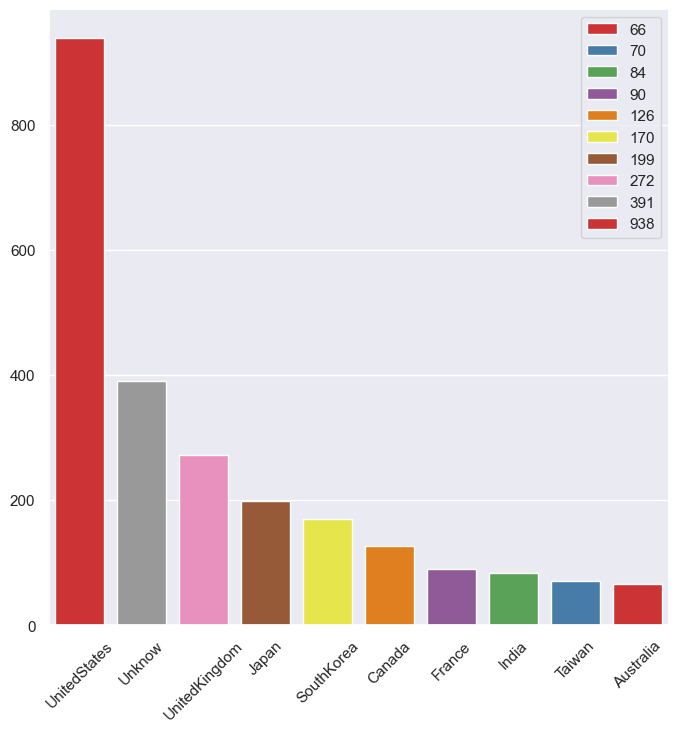

In [121]:
plt.figure(figsize = (8,8))
ax = sns.barplot(x=names, y=values, hue = values, palette = "Set1", legend = True)
ax.set_xticklabels(names, rotation =45)

In [123]:
features = ['title', 'duration']
durations = shows[features]
durations

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season


In [125]:
durations['no_seasons'] = durations['duration'].str.replace(' Season', '')
durations

/var/folders/c5/5pjfgv2j0s592_vgx99mvzym0000gn/T/ipykernel_84067/3633563102.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_seasons
1,Blood & Water,2 Seasons,2s
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2s
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2s
8796,Yunus Emre,2 Seasons,2s
8797,Zak Storm,3 Seasons,3s
8800,Zindagi Gulzar Hai,1 Season,1


In [127]:
durations['no_seasons'] = durations['no_seasons'].str.replace('s', '')
durations

/var/folders/c5/5pjfgv2j0s592_vgx99mvzym0000gn/T/ipykernel_84067/4009594879.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3
8800,Zindagi Gulzar Hai,1 Season,1


In [129]:
durations['no_seasons'] = durations['no_seasons'].astype(str).astype(int)
durations

/var/folders/c5/5pjfgv2j0s592_vgx99mvzym0000gn/T/ipykernel_84067/3776598604.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3
8800,Zindagi Gulzar Hai,1 Season,1


In [131]:
t = ['title', 'no_seasons']
top = durations[t]

top= top.sort_values(by='no_seasons', ascending = False)

([<matplotlib.axis.XTick at 0x31714e870>,
 [Text(0.0, 0, "Grey's Anatomy"),
  Text(1.0, 0, 'Supernatural'),
  Text(2.0, 0, 'NCIS'),
  Text(3.0, 0, 'Heartland'),
  Text(4.0, 0, 'COMEDIANS of the world'),
  Text(5.0, 0, 'Red vs. Blue'),
  Text(6.0, 0, 'Trailer Park Boys'),
  Text(7.0, 0, 'Criminal Minds'),
  Text(8.0, 0, 'Frasier'),
  Text(9.0, 0, 'Cheers'),
  Text(10.0, 0, 'Shameless (U.S.)'),
  Text(11.0, 0, 'Friends'),
  Text(12.0, 0, 'LEGO Ninjago: Masters of Spinjitzu'),
  Text(13.0, 0, 'Danger Mouse: Classic Collection'),
  Text(14.0, 0, 'The Walking Dead'),
  Text(15.0, 0, 'Stargate SG-1'),
  Text(16.0, 0, "Dad's Army"),
  Text(17.0, 0, 'The Great British Baking Show'),
  Text(18.0, 0, 'Forensic Files'),
  Text(19.0, 0, 'The Office (U.S.)')])

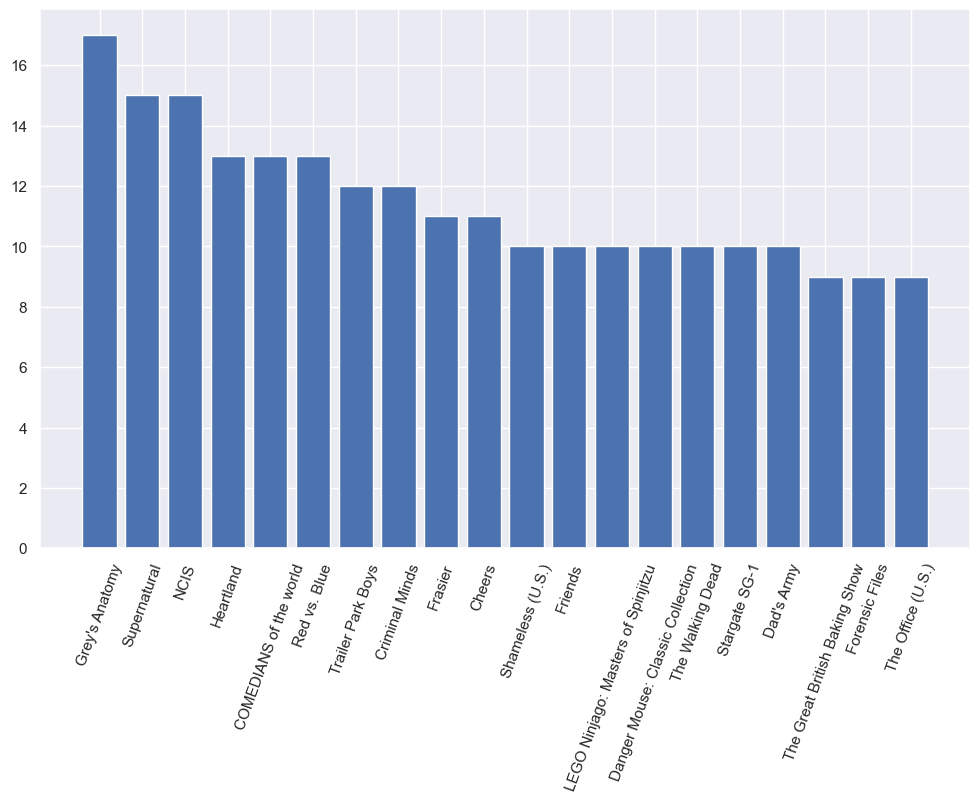

In [133]:
top20 = top[0:20]
plt.figure(figsize = (12,7))

plt.bar(top20['title'], top20['no_seasons'])
plt.xticks(top20['title'], rotation = 70)

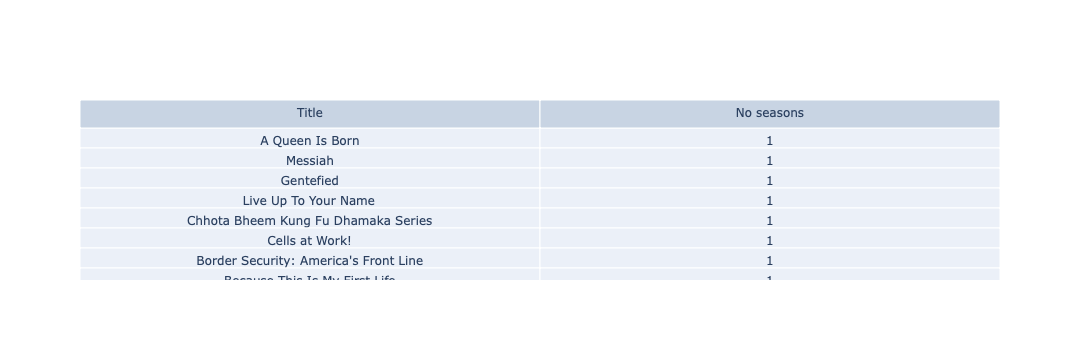

In [135]:
bottom = top.sort_values(by='no_seasons')
bottom = bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Table(header=dict(values=['Title', 'No seasons']), cells=dict(values=[bottom['title'], bottom['no_seasons']]))]
)
fig.show()

In [137]:
shows['listed_in']

1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
5                      TV Dramas, TV Horror, TV Mysteries
                              ...                        
8795                               Anime Series, Kids' TV
8796                    International TV Shows, TV Dramas
8797                                             Kids' TV
8800    International TV Shows, Romantic TV Shows, TV ...
8803               Kids' TV, Korean TV Shows, TV Comedies
Name: listed_in, Length: 2676, dtype: object

In [139]:
from collections import Counter

genres = list(shows['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))

g = Counter(gen)

In [141]:
g = sorted(g.items(), key = lambda item: g[item[0]], reverse=True)
g

[('InternationalTVShows', 1351),
 ('TVDramas', 763),
 ('TVComedies', 581),
 ('CrimeTVShows', 470),
 ("Kids'TV", 451),
 ('Docuseries', 395),
 ('RomanticTVShows', 370),
 ('RealityTV', 255),
 ('BritishTVShows', 253),
 ('AnimeSeries', 176),
 ('Spanish-LanguageTVShows', 174),
 ('TVAction&Adventure', 168),
 ('KoreanTVShows', 151),
 ('TVMysteries', 98),
 ('Science&NatureTV', 92),
 ('TVSci-Fi&Fantasy', 84),
 ('TVHorror', 75),
 ('TeenTVShows', 69),
 ('TVThrillers', 57),
 ('Stand-UpComedy&TalkShows', 56),
 ('Classic&CultTV', 28),
 ('TVShows', 16)]

In [143]:
genre_name = [name for name, value in g]
genre_name

['InternationalTVShows',
 'TVDramas',
 'TVComedies',
 'CrimeTVShows',
 "Kids'TV",
 'Docuseries',
 'RomanticTVShows',
 'RealityTV',
 'BritishTVShows',
 'AnimeSeries',
 'Spanish-LanguageTVShows',
 'TVAction&Adventure',
 'KoreanTVShows',
 'TVMysteries',
 'Science&NatureTV',
 'TVSci-Fi&Fantasy',
 'TVHorror',
 'TeenTVShows',
 'TVThrillers',
 'Stand-UpComedy&TalkShows',
 'Classic&CultTV',
 'TVShows']

In [145]:
genre_values = [value for name, value in g]
genre_values

[1351,
 763,
 581,
 470,
 451,
 395,
 370,
 255,
 253,
 176,
 174,
 168,
 151,
 98,
 92,
 84,
 75,
 69,
 57,
 56,
 28,
 16]

/var/folders/c5/5pjfgv2j0s592_vgx99mvzym0000gn/T/ipykernel_84067/1627463004.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0.5, 1.0, 'Genres')

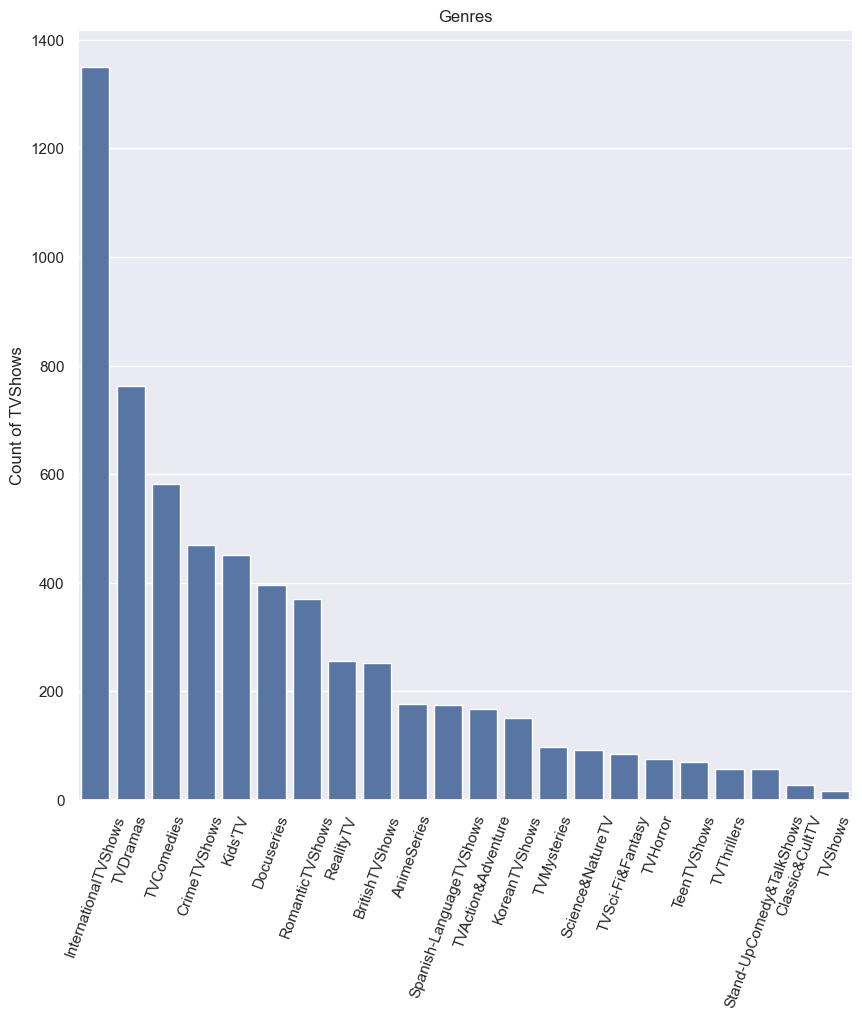

In [147]:
fig = plt.figure(figsize= (10, 10))
ax = sns.barplot(x=genre_name, y = genre_values)

ax.set_xticklabels(genre_name, rotation = 70)
ax.set_ylabel("Count of TVShows")
ax.set_title("Genres")

In [149]:
durations[t]

,title,no_seasons
1,Blood & Water,2
2,Ganglands,1
3,Jailbirds New Orleans,1
4,Kota Factory,2
5,Midnight Mass,1
...,...,...
8795,Yu-Gi-Oh! Arc-V,2
8796,Yunus Emre,2
8797,Zak Storm,3
8800,Zindagi Gulzar Hai,1


/var/folders/c5/5pjfgv2j0s592_vgx99mvzym0000gn/T/ipykernel_84067/327847814.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




([<matplotlib.axis.XTick at 0x14fb9dbb0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(15, 0, '15'),
  Text(17, 0, '17')])

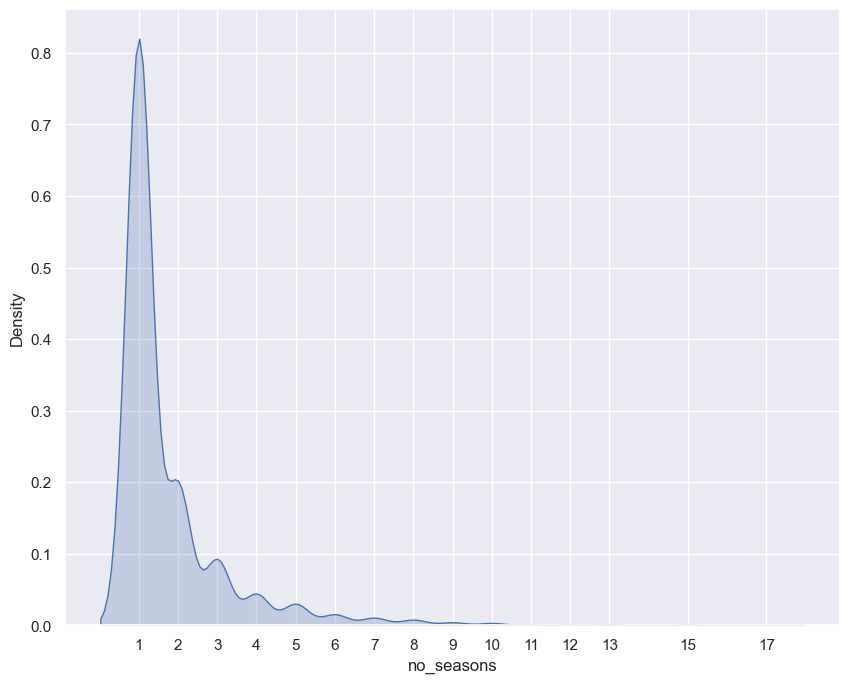

In [151]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.kdeplot(data=durations['no_seasons'], shade=True)
plt.xticks(sorted(durations['no_seasons'].unique()))

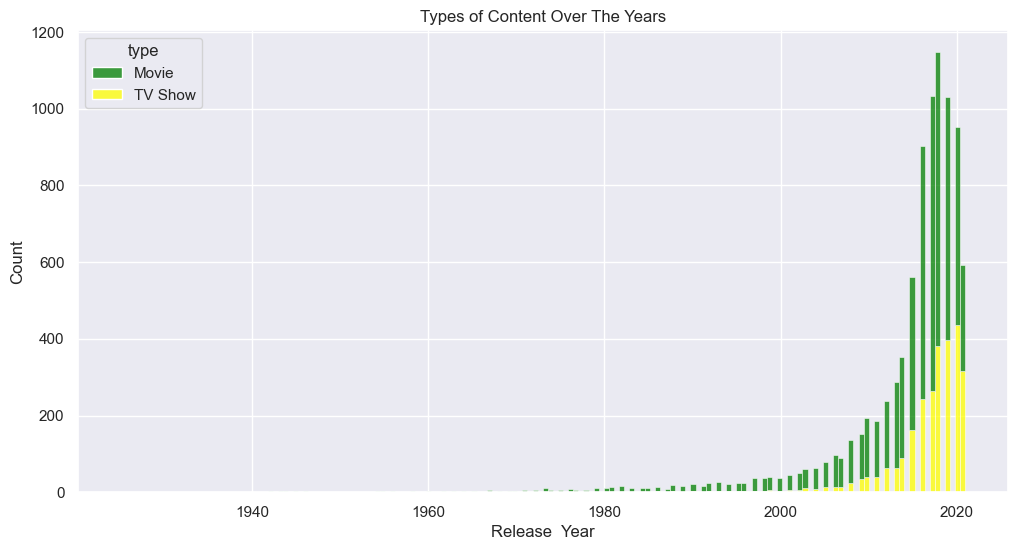

In [153]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='release_year', hue = 'type', multiple="stack", palette={"Movie": "green", "TV Show": "yellow"})
plt.title('Types of Content Over The Years')
plt.xlabel('Release  Year')
plt.ylabel('Count')
plt.show()

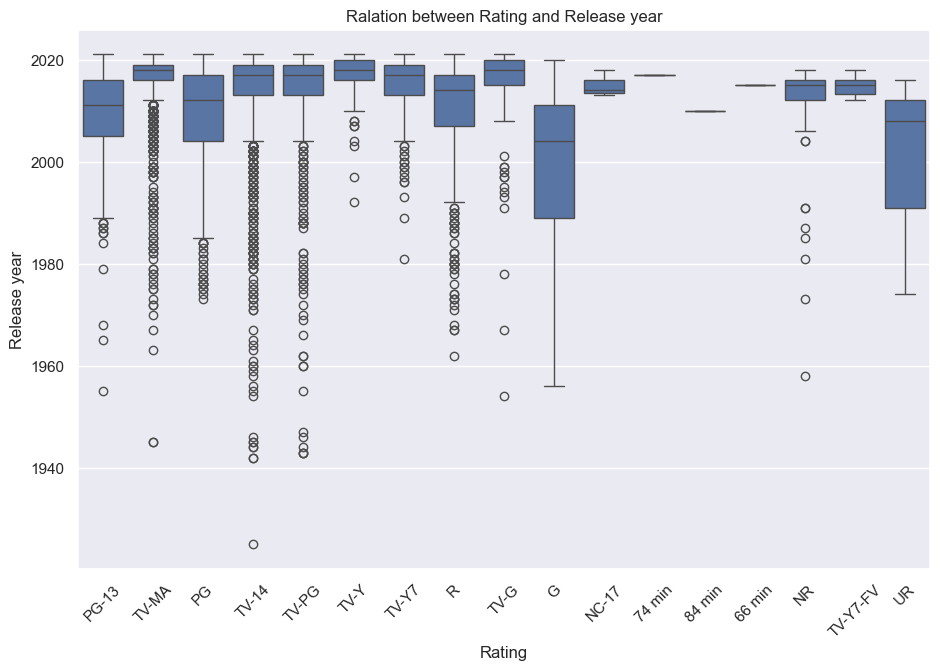

In [155]:
sns.color_palette()
plt.figure(figsize=(11, 7))
sns.boxplot(x='rating', y='release_year', data=data)
plt.title('Ralation between Rating and Release year')
plt.xlabel('Rating')
plt.ylabel('Release year')
plt.xticks(rotation=45)
plt.show()